In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import graph as gr
import utils as ut
import feature_selection as fs
import classification as cl
import os.path
import matplotlib.pyplot as plt
from sklearn import preprocessing
import importlib
import community
import seaborn as sns
from gensim.models import KeyedVectors
from pyemd import emd
from gensim import corpora
from nltk.corpus import stopwords
from gensim.matutils import softcossim

In [281]:
importlib.reload(fs)

<module 'feature_selection' from 'C:\\Users\\faisal\\PycharmProjects\\linkPrediction\\feature_selection.py'>

In [4]:
word_vectors = KeyedVectors.load_word2vec_format('pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin', binary=True)

In [23]:
filepath=['dataset/apnea-all,3.csv',
         'dataset/apnea-distinct_keyword.csv']
graphpath='C:/Users/faisal/PycharmProjects/linkPrediction/graphs'
column_split=['keyword','author_name','affiliation_1','affiliation_2','country']
#time=[parent_start_year, train_start_year, test_start_year, total_test_period_in_year, total_year_in_each_iteration]
time=[1980,1991,2004,1,1]
df, key_list = ut.load_dataset(filepath, column_split)

In [14]:
#dynamic train graphs and test graph build and save in disk 
gr.dynamic_train_test_graph_build(df, key_list, graphpath, time)

447
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1991.gpickle saved, nodes: 54 edges: 60
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1992.gpickle saved, nodes: 64 edges: 68
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1993.gpickle saved, nodes: 75 edges: 88
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1994.gpickle saved, nodes: 93 edges: 76
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1995.gpickle saved, nodes: 132 edges: 170
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1996.gpickle saved, nodes: 155 edges: 219
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1997.gpickle saved, nodes: 147 edges: 158
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1998.gpickle saved, nodes: 149 edges: 180
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1999.gpickle saved, nodes: 165 edges: 163
C:/Users/faisal/PycharmProjects/

In [25]:
#load all graphs
g_train, g_test, g_parent, g_train_static, g_test_static = gr.graph_load(graphpath, time)

C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1991.gpickle loaded, nodes: 54 edges: 60
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1992.gpickle loaded, nodes: 64 edges: 68
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1993.gpickle loaded, nodes: 75 edges: 88
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1994.gpickle loaded, nodes: 93 edges: 76
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1995.gpickle loaded, nodes: 132 edges: 170
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1996.gpickle loaded, nodes: 155 edges: 219
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1997.gpickle loaded, nodes: 147 edges: 158
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1998.gpickle loaded, nodes: 149 edges: 180
C:/Users/faisal/PycharmProjects/linkPrediction/graphs\train_graph_1999.gpickle loaded, nodes: 165 edges: 163
C:/Users/faisal/PycharmProj

In [207]:
train_data, train_data_static, parent_data, test_data_static = cl.non_edge_feature_dataframe(g_train, 
                                                                                             g_test,
                                                                                             g_parent,
                                                                                             g_train_static, 
                                                                                             g_test_static,  
                                                                                             time, 
                                                                                             freq=10)

parent
positive train: 102 negative train: 3894 train_size: 3996
train
positive train: 416 negative train: 97676 train_size: 98092
train
positive train: 416 negative train: 4160 train_size: 4576
train
positive train: 32 negative train: 51 train_size: 83
train
positive train: 25 negative train: 75 train_size: 100
train
positive train: 30 negative train: 104 train_size: 134
train
positive train: 49 negative train: 185 train_size: 234
train
positive train: 78 negative train: 342 train_size: 420
train
positive train: 120 negative train: 468 train_size: 588
train
positive train: 98 negative train: 439 train_size: 537
train
positive train: 112 negative train: 441 train_size: 553
train
positive train: 106 negative train: 544 train_size: 650
train
positive train: 130 negative train: 637 train_size: 767
train
positive train: 133 negative train: 869 train_size: 1002
train
positive train: 139 negative train: 745 train_size: 884
train
positive train: 176 negative train: 1007 train_size: 1183
test


In [282]:
#parent keys for 1st year
parent_keys = fs.parent_key_from_parent_graph(df, key_list, g_parent, g_train, time)

dist_aut_art: 3.1657091642888293 dist_y_weight: 4.822365429261176


In [10]:
ts=1993
te=2003
it_index=1
partition = {}
d_c={}
for t in range(ts,te,it_index):
    partition[t] = community.best_partition(g_train[t])
    G_main_com = g_train[t].copy()
    d_c[t]={}
    for com in set(partition[t].values()) :
        list_nodes = [node for node in partition[t].keys() if partition[t][node] == com]
        H = G_main_com.subgraph(list_nodes)
        d_c[t][com] = nx.degree_centrality(H)

In [11]:
ts=1993
te=2003
it_index=1
parent_1st_total = set(parent_1st['node_index'])
parent_1st_set = set(parent_1st['node_index'][0:10])
parent_2nd =set()
p_len=[]

p1={}
p2={}
ch={}
gst={}
p1[1993]=parent_1st_set.intersection(set(g_train[1993].nodes()))
p2[1993]=set()
ch[1993]=set()
gst[1993]=set()
for t in range(ts,te,it_index):
    for p in p1[t]:
        nb1 = set(nx.all_neighbors(g_train[t],p))
        p2[t].update(nb1)
        for nbs in nb1:
            nb2 = set(nx.all_neighbors(g_train[t],nbs))
            ch[t].update(nb2)
    p2[t]=p2[t].difference(p1[t])
    ch[t]=ch[t].difference(p1[t],p2[t])
    gst[t]=set(g_train[t].nodes()).difference(p1[t],p2[t],ch[t])
    if t<te-1:
        p1[t+1]=p1[t].union(p2[t])
        p1[t+1]=p1[t+1].intersection(set(g_train[t+1].nodes()))
        p2[t+1]=set()
        ch[t+1]=set()
        gst[t+1]=set()        
    print(len(p1[t]),len(p2[t]),len(ch[t]),len(gst[t]),t)    

p1p=[]
p2p=[]
chp=[]
gstp=[]
p1n=[]
p2n=[]
chn=[]
gstn=[]
p1p2p=[]
p1p2n=[]
p1gstp=[]
p1gstn=[]
for t in range(ts,te,it_index):
    p1p.append(0)
    p2p.append(0)
    chp.append(0)
    gstp.append(0)
    p1n.append(0)
    p2n.append(0)
    chn.append(0)
    gstn.append(0)
    p1p2p.append(0)
    p1p2n.append(0)
    p1gstp.append(0)
    p1gstn.append(0)
    index = t-ts
    for i,rows in train_data[t].iterrows():
        if ((rows[0][0] in p1[t]) and (rows[0][1] in p1[t])) and rows['label']==1:
            p1p[index]=p1p[index]+1
        if ((rows[0][0] in p1[t]) and (rows[0][1] in p1[t])) and rows['label']==0:
            p1n[index]=p1n[index]+1
        if ((rows[0][0] in p2[t]) and (rows[0][1] in p2[t])) and rows['label']==1:
            p2p[index]=p2p[index]+1
        if ((rows[0][0] in p2[t]) and (rows[0][1] in p2[t])) and rows['label']==0:
            p2n[index]=p2n[index]+1
        if ((rows[0][0] in ch[t]) and (rows[0][1] in ch[t])) and rows['label']==1:
            chp[index]=chp[index]+1
        if ((rows[0][0] in ch[t]) and (rows[0][1] in ch[t])) and rows['label']==0:
            chn[index]=chn[index]+1
        if ((rows[0][0] in gst[t]) and (rows[0][1] in gst[t])) and rows['label']==1:
            gstp[index]=gstp[index]+1
        if ((rows[0][0] in gst[t]) and (rows[0][1] in gst[t])) and rows['label']==0:
            gstn[index]=gstn[index]+1
        if (((rows[0][0] in p1[t]) and (rows[0][1] in p2[t])) or
            ((rows[0][0] in p2[t]) and (rows[0][1] in p1[t]))) and rows['label']==1:
            p1p2p[index]=p1p2p[index]+1
        if (((rows[0][0] in p1[t]) and (rows[0][1] in p2[t])) or
            ((rows[0][0] in p2[t]) and (rows[0][1] in p1[t]))) and rows['label']==0:
            p1p2n[index]=p1p2n[index]+1
        if (((rows[0][0] in p1[t]) and (rows[0][1] in gst[t])) or
            ((rows[0][0] in gst[t]) and (rows[0][1] in p1[t]))) and rows['label']==1:
            p1gstp[index]=p1gstp[index]+1
        if (((rows[0][0] in p1[t]) and (rows[0][1] in gst[t])) or
            ((rows[0][0] in gst[t]) and (rows[0][1] in p1[t]))) and rows['label']==0:
            p1gstn[index]=p1gstn[index]+1
    cl.print_attributes(train_data[t],'train')
    print("p1p:",p1p[index],"p1n:",p1n[index],"p2p:",p2p[index],"p2n:",
          p2n[index],"chp:",chp[index],"chn:",chn[index],"gstp:",
          gstp[index],"gstn:",gstn[index],t,"p1p2p:",
          p1p2p[index],"p1p2n:",p1p2n[index],"p1gstp:",p1gstp[index],"p1gstn:",p1gstn[index],
          p1p[index]+p2p[index]+p1p2p[index]+p1gstp[index]+chp[index],
          p1n[index]+p2n[index]+p1p2n[index]+p1gstn[index]+chn[index])
    #print(p1p[index],p1n[index])
    
        


8 21 18 55 1993
16 41 3 63 1994
36 67 12 66 1995
65 74 5 56 1996
85 52 7 46 1997
75 72 5 48 1998
84 71 12 51 1999
88 94 6 67 2000
107 105 7 62 2001
126 111 9 65 2002
positive train: 120 negative train: 600 train_size: 720
p1p: 7 p1n: 1 p2p: 0 p2n: 25 chp: 7 chn: 14 gstp: 22 gstn: 178 1993 p1p2p: 10 p1p2n: 18 p1gstp: 35 p1gstn: 51 59 109
positive train: 162 negative train: 810 train_size: 972
p1p: 10 p1n: 10 p2p: 15 p2n: 84 chp: 0 chn: 1 gstp: 21 gstn: 213 1994 p1p2p: 32 p1p2n: 81 p1gstp: 41 p1gstn: 119 98 295
positive train: 249 negative train: 1245 train_size: 1494
p1p: 40 p1n: 49 p2p: 31 p2n: 152 chp: 0 chn: 6 gstp: 16 gstn: 154 1995 p1p2p: 53 p1p2n: 171 p1gstp: 49 p1gstn: 191 173 569
positive train: 310 negative train: 1550 train_size: 1860
p1p: 94 p1n: 151 p2p: 17 p2n: 218 chp: 0 chn: 0 gstp: 7 gstn: 117 1996 p1p2p: 81 p1p2n: 377 p1gstp: 71 p1gstn: 302 263 1048
positive train: 287 negative train: 1435 train_size: 1722
p1p: 129 p1n: 276 p2p: 7 p2n: 102 chp: 0 chn: 3 gstp: 8 gstn: 85

In [256]:
ts=1993
te=2003
it_index=1
list1 = []
for t in range(ts,te,it_index):
    counn=0
    counp=0
    weight={}
    for i,rows in train_data[t].iterrows():
        n1=rows[0][0]
        n2=rows[0][1]
        l1=gr.node_label_find(key_list,n1)
        l2=gr.node_label_find(key_list,n2)
        #l=list( nx.all_simple_paths(g_train[t], source=rows[0][0], target=rows[0][1],cutoff=3))
#         nb1 = set(nx.all_neighbors(g_train[t],rows[0][0]))
#         nb2 = set(nx.all_neighbors(g_train[t],rows[0][1]))
        if rows['label']==1:
            print(l1,"-",l2,"+++++++++++++++")
            print(word_vectors.n_similarity(l1.lower().split(), l2.lower().split()))
#             print(g_train[t].nodes[n1]['title'])
#             print(g_train[t].nodes[n2]['title'])
        if rows['label']==0:
            print(l1,"-",l2,"----------------")
            print(word_vectors.n_similarity(l1.lower().split(), l2.lower().split()))
#             print(g_train[t].nodes[n1]['title'])
#             print(g_train[t].nodes[n2]['title'])
#             counn=counn+1
    print(counp,counn)

sleep fragmentation - larynx ----------------
0.09306789596624684
narcolepsy - hemodynamics ----------------
0.15051164155645438
hypertension - depression +++++++++++++++
0.474122664773128
airway - pharynx ----------------
0.486440728557152
alcohol - ventilatory control ----------------
0.24601616806088084
pharyngeal pressure - therapy ----------------
0.24946210199924954
high altitude - body position ----------------
0.3421392236454759
sleepiness - oropharynx ----------------
0.14277379806859616
ondine curse - chemoreceptors ----------------
0.18180823520033107
pressure support - alte ----------------
0.1743892184583323
fibromyalgia - cephalometric ----------------
0.21293008565498642
child - insomnia ----------------
0.341248807496575
weight loss - upper airway mechanics ----------------
0.34245849938949563
review - pharynx ----------------
0.1408935289085189
review - cephalometric ----------------
0.17112680134773658
pharynx - co2 response ----------------
0.1708022135917528
compute

upper airway muscle - fibromyalgia ----------------
0.22114810298426033
reflux - respiratory control ----------------
0.34858934397372876
congenital central hypoventilation - upper ----------------
0.403158514125809
review - sudden infant death syndrome ----------------
0.32533155544749287
computed tomography - upper ----------------
0.31195035519664516
tonsillectomy - insulin resistance ----------------
0.13240142029314206
co2 response - aging ----------------
0.27287246879016874
airway - sleep +++++++++++++++
0.3139671296384618
oxygen saturation - sleep ----------------
0.34138282975094425
weight loss - alte ----------------
0.17635077601482704
brainstem - syndrome ----------------
0.28198119413852474
ondine curse - hyperventilation ----------------
0.3598855273848178
hypoventilation - proteinuria ----------------
0.25768136756550025
hypercapnia - heart rate +++++++++++++++
0.3162505722255562
tracheostomy - anesthesia ----------------
0.4960743161449344
hemodynamics - congenital cent

pharyngeal pressure - ventilation ----------------
0.5008261137308274
hemodynamics - hyperventilation ----------------
0.4217895180655611
sleep fragmentation - insomnia +++++++++++++++
0.6013435685667992
hypoxic ventilatory response - aging ----------------
0.284861175992553
sudden infant death syndrome - hyperventilation ----------------
0.3740438685826562
ambulatory - sleep +++++++++++++++
0.4533097851946142
genioglossus - respiration +++++++++++++++
0.4037814103175271
narcolepsy - insomnia +++++++++++++++
0.6308057096799815
pharyngeal pressure - biological rhythm ----------------
0.31902273000409215
zolpidem - oropharynx ----------------
0.1579127684815867
chemoreceptors - upper airway ----------------
0.3168835172993405
depression - insomnia +++++++++++++++
0.7363812853838158
pressure support - sleep fragmentation ----------------
0.3553978939104756
oropharynx - snoring ----------------
0.3740238403878496
review - mechanical ventilation ----------------
0.17801346663022438
nasal ob

cephalometric - snoring +++++++++++++++
0.4884930636116446
sudden infant death syndrome - sleep +++++++++++++++
0.37357294106506717
child - mechanical ventilation ----------------
0.19083823275901754
ambulatory - flow limitation ----------------
0.25649018859119727
computed tomography - testosterone ----------------
0.0641743002019161
hypoventilation - depression ----------------
0.36365819268308575
computed tomography - alte ----------------
0.16234400599178617
carbon dioxide - upper airway muscle +++++++++++++++
0.3138658163047563
hypoxemia - snoring ----------------
0.5128073262824542
flow limitation - snoring +++++++++++++++
0.24968568780886832
alcohol - cephalometric ----------------
0.1187904063526891
reflux - bradycardia ----------------
0.2943147952918531
chemoreceptors - flow limitation ----------------
0.21639517744487433
sleep - gaba ----------------
0.17664865198213972
narcolepsy - glycine ----------------
0.11019075396473627
respiration - periodic breathing +++++++++++++++

weight loss - body position ----------------
0.5545921391763603
hypoxic ventilatory response - tonsillectomy ----------------
0.16477819994714743
sleepwalking - cephalometric ----------------
0.25616771563703844
laryngeal mask airway - insulin resistance ----------------
0.33400086281624985
reflux - hyperventilation ----------------
0.31724915533253917
daytime sleepiness - oropharynx ----------------
0.1561759934701496
upper airway - human +++++++++++++++
0.26730786174147764
airway - human +++++++++++++++
0.22938596462444738
bradycardia - control of breathing +++++++++++++++
0.387475827677653
pharyngeal pressure - insulin resistance ----------------
0.36907983307890396
narcolepsy - clinical feature ----------------
0.2698605436782431
pressure support - flow limitation ----------------
0.4375383684472008
intubation - inspiratory effort ----------------
0.44234805940959887
weight loss - congenital central hypoventilation syndrome ----------------
0.37611961662535887
hypoxic ventilatory r

In [182]:
def year_score_calculate(g,node,year):
    year_score ={1993:1,1994:2,1995:3,1996:4,1997:5,1998:6,1999:7,2000:8,2001:9,2002:10}
    y_weight=0
    for y in g.nodes[node]['year']:
        if y<=year:
            y_weight=y_weight+year_score[y]
            y_weight=y_weight/55
        else:
            pass
    return y_weight

In [183]:
#node feature build for all dynamic time step
ts=1993
te=2003
it_index=1
node_feature={}
for t in range(ts,te,it_index):
    node_feature[t] = fs.build_feature_set(df, key_list, g_train[t], t, t+1)
    node_feature[t]['type']=node_feature[t].apply(lambda row: 5 if row['node_index'] in p1[t] 
                                                  else 3 if row['node_index'] in p2[t] 
                                                  else 2 if row['node_index'] in gst[t] 
                                                  else 1 if row['node_index'] in ch[t]
                                                  else 0,axis=1)
    node_feature[t]['aut+art']=node_feature[t].apply(lambda row: 0.7*row['term_art']+row['term_aut'],axis=1)
    node_feature[t]['partition_id']=node_feature[t].apply(lambda row: partition[t][row['node_index']],axis=1)
    node_feature[t]['partition_cnt']=node_feature[t].apply(lambda row: 
                                                           d_c[t][partition[t][row['node_index']]][row['node_index']],axis=1)
    node_feature[t]['y_weight']=node_feature[t].apply(lambda row: 
                                                year_score_calculate(g_train_static,row['node_index'],t),axis=1)

332
521
746
790
818
833
1009
1220
1228
1372


In [290]:
node_feature[2002]

,node_index,y_weight,term_art,term_aut,closeness,type,aut+art,partition_id,partition_cnt
0,12632,0.076087,-1.949797,-1.265260,0.000000,2,-2.630118,0,1.000000
1,2325,0.181818,-1.949797,-1.496506,0.000000,2,-2.861364,1,1.000000
2,4947,0.181818,-1.949797,-1.752222,0.000000,2,-3.117080,2,1.000000
3,7105,0.166948,0.893887,1.064247,0.179646,3,1.689967,3,0.103448
4,7678,0.181818,-1.052213,-0.390585,0.142002,1,-1.127134,3,0.068966
5,7769,0.130627,-0.058579,0.243952,0.142892,1,0.202947,3,0.137931
6,6451,0.184842,4.666249,3.522430,0.272690,5,6.788804,3,0.482759
7,12586,0.184842,1.972689,1.791425,0.240158,5,3.172307,4,0.250000
8,1513,0.184842,2.863034,2.704781,0.273781,5,4.708904,5,0.500000
9,5591,0.092292,0.276486,0.834360,0.228914,3,1.027900,6,0.038462


In [270]:
#train data feature
ts=1993
te=2003
it_index=1

for t in range(ts,te,it_index):
    nf1 = dict(zip(node_feature[t]['node_index'],node_feature[t]['term_aut']))
    nf2 = dict(zip(node_feature[t]['node_index'],node_feature[t]['term_art']))
    nf3 = dict(zip(node_feature[t]['node_index'],node_feature[t]['closeness']))
    part = dict(zip(node_feature[t]['node_index'],node_feature[t]['partition_id']))
    types = dict(zip(node_feature[t]['node_index'],node_feature[t]['type']))
    year = dict(zip(node_feature[t]['node_index'],node_feature[t]['y_weight']))
    partition_cnt = dict(zip(node_feature[t]['node_index'],node_feature[t]['partition_cnt']))
    train_data[t]['aut']=train_data[t].apply(lambda row: 
                                                 nf1[row['row_name'][0]]*nf1[row['row_name'][1]],axis=1)
    train_data[t]['art']=train_data[t].apply(lambda row: 
                                                 nf2[row['row_name'][0]]*nf2[row['row_name'][1]],axis=1)
    train_data[t]['closeness']=train_data[t].apply(lambda row: 
                                                 nf3[row['row_name'][0]]+nf3[row['row_name'][1]],axis=1)
    train_data[t]['partition']=train_data[t].apply(lambda row: 1 if part[row['row_name'][0]]==part[row['row_name'][1]]
                                                 else 0,axis=1)
    train_data[t]['y_weight']=train_data[t].apply(lambda row: 
                                                 year[row['row_name'][0]]+year[row['row_name'][1]],axis=1)
    train_data[t]['type']=train_data[t].apply(lambda row: 
                                                 types[row['row_name'][0]]*types[row['row_name'][1]],axis=1)
    train_data[t]['partition_cnt']=train_data[t].apply(lambda row: 
                                                 partition_cnt[row['row_name'][0]]*partition_cnt[row['row_name'][1]],axis=1)
    train_data[t]['path_len3']=train_data[t].apply(lambda row: 
                                                 len(list( nx.all_simple_paths
                                                          (g_train[t], source=row[0][0], target=row[0][1],cutoff=3))),axis=1)
    train_data[t]['semantic_sim']=train_data[t].apply(lambda row:
                                                        word_vectors.n_similarity(
                                                            gr.node_label_find(key_list,row[0][0]).lower().split(),
                                                        gr.node_label_find(key_list,row[0][1]).lower().split()) ,axis=1)

    train_data[t]['aut']=ut.min_max_norm(train_data[t]['aut'])
    train_data[t]['art']=ut.min_max_norm(train_data[t]['art'])
    train_data[t]['closeness']=ut.min_max_norm(train_data[t]['closeness'])
    train_data[t]['type']=ut.min_max_norm(train_data[t]['type'])
    #train_data[t]['y_weight']=ut.min_max_norm(train_data[t]['y_weight'])
    train_data[t]['partition_cnt']=ut.min_max_norm(train_data[t]['partition_cnt'])
    train_data[t]['path_len3']=ut.min_max_norm(train_data[t]['path_len3'])

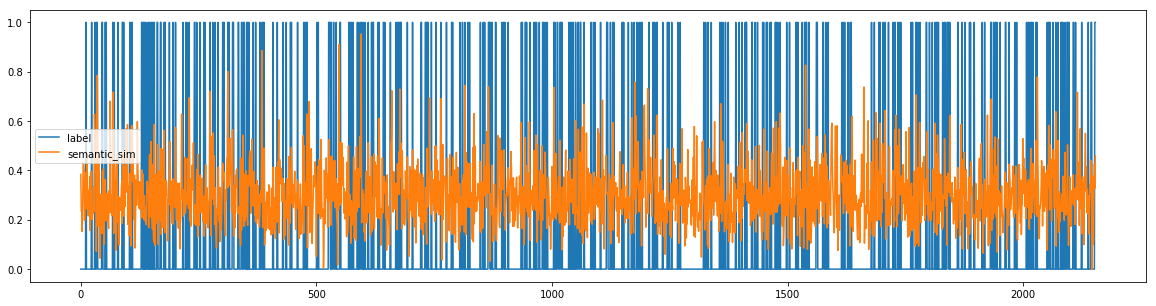

In [273]:

train_data[2000].plot(y=['label','semantic_sim'],figsize=(20, 5))

In [228]:
len(train_data[2002][(train_data[2002]['label']==0)])

2000

In [261]:
train_data[2002][(train_data[2002]['label']==1)]
train_data[2002]['e'] = train_data[2002].sum(axis=1)

In [269]:
train_data[1993][(train_data[1993]['label']==0)]['semantic_sim'].mean()

0.28990412962407786

In [283]:
train_data[2002]

,row_name,label,aut,art,closeness,partition,y_weight,type,partition_cnt,path_len3,e,semantic_sim
0,"(12485, 598)",0,0.359774,0.161146,0.420430,0,0.369666,1.000000,0.615088,0.000000,0.298041,0.302955
1,"(14431, 14642)",0,0.547062,0.453268,0.834857,0,0.366660,0.583333,0.014197,0.166667,0.306025,0.360530
2,"(10444, 1022)",0,0.551653,0.374532,0.326615,0,0.369256,0.208333,0.374517,0.000000,0.153881,0.687669
3,"(8207, 438)",0,0.523634,0.425037,0.844046,0,0.297287,0.583333,0.021681,0.150000,0.281833,0.320657
4,"(11914, 10139)",0,0.471590,0.491318,0.000000,0,0.297190,0.125000,1.000000,0.000000,0.189899,0.144219
5,"(6451, 4836)",1,0.808896,0.880719,0.940053,0,0.369684,1.000000,0.222212,0.316667,0.820180,0.262481
6,"(2766, 13087)",0,0.511336,0.359178,0.289881,0,0.366660,0.375000,0.135697,0.000000,0.120468,0.441704
7,"(419, 11996)",1,0.457338,0.372933,0.753087,0,0.314158,0.583333,0.010600,0.066667,0.424374,0.232500
8,"(6702, 8926)",1,0.471045,0.259339,0.323496,0,0.369348,0.375000,0.226676,0.000000,0.317790,0.275727
9,"(3482, 16226)",0,0.513367,0.264113,0.614352,0,0.366324,0.333333,0.007071,0.000000,0.132623,0.259218
